In [119]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import itertools
from sklearn.externals import joblib
%matplotlib inline

In [120]:
shift = 200
yTestDf = pd.DataFrame()
yTrainDf = pd.DataFrame()

### use y_train_truth of xgb runs

In [121]:
yTrainTrue = joblib.load('../output/xgb_combined_transformed_10folds_trian_true_y.sav')

### load the xgb results

In [122]:
# load xgb results
col_name = 'xgb_new_10folds'
yTestDf[col_name] = pd.read_csv('../output/xgb_combined_transformed_10folds.csv' , usecols = ['loss'])
yTestDf[col_name] = np.log(yTestDf[col_name]+shift)
data = joblib.load('../output/xgb_combined_transformed_10folds_pred_on_trian.sav')
yTrainDf[col_name] = pd.Series(data[:,0],index = range(0,len(data)))

0.6130567623


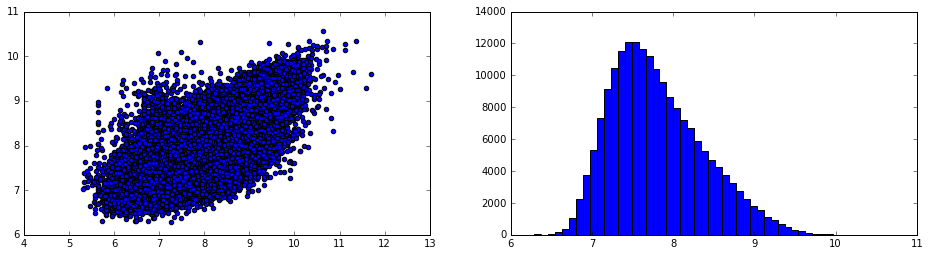

In [123]:
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
plt.scatter(yTrainTrue,yTrainDf[col_name]);
plt.subplot(1,2,2)
plt.hist(yTrainDf[col_name],bins=50);
print yTrainDf[col_name].skew()

### keras results with raw features

In [124]:
# load keras results
yTestDf['keras_raw_5folds'] = pd.read_csv('../output/keras_5folds.csv' , usecols = ['loss'])
yTestDf['keras_raw_5folds'] = np.log(yTestDf['keras_raw_5folds'] + shift)
index0 = pd.read_csv('./preds_oob.csv')
indexed = index0.sort_values(by='id')
yTrainDf['keras_raw_5folds'] = np.log(indexed['loss'].values+shift)

0.6130567623


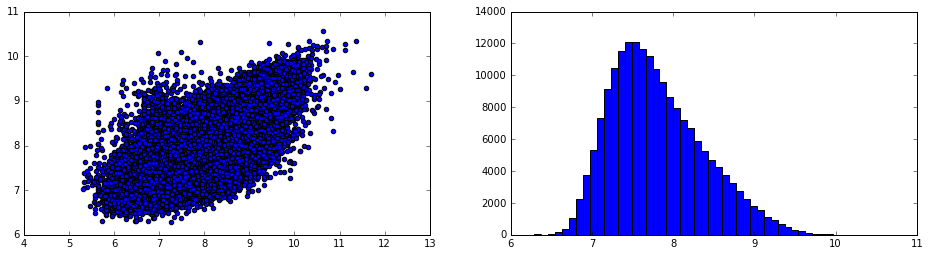

In [125]:
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
plt.scatter(yTrainTrue,yTrainDf[col_name]);
plt.subplot(1,2,2)
plt.hist(yTrainDf[col_name],bins=50);
print yTrainDf[col_name].skew()

## load LightGBM results

In [126]:
# load xgb results
yTestDf['lgbm_raw_10folds'] = pd.read_csv('../output/lgbm_10folds.csv' , usecols = ['loss'])
yTestDf['lgbm_raw_10folds'] = np.log(yTestDf['lgbm_raw_10folds']+shift)
data = joblib.load('../output/lgbm_10folds_pred_on_train.sav')
yTrainDf['lgbm_raw_10folds'] = pd.Series(data[:,0],index = range(0,len(data)))

0.6130567623


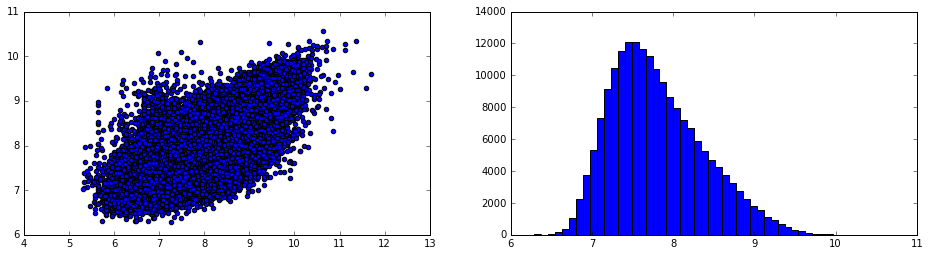

In [127]:
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
plt.scatter(yTrainTrue,yTrainDf[col_name]);
plt.subplot(1,2,2)
plt.hist(yTrainDf[col_name],bins=50);
print yTrainDf[col_name].skew()

# load LightGBM with combined features

In [128]:
# load xgb results
col_name = 'lgbm_new_10folds'
yTestDf[col_name] = pd.read_csv('../output/lgbm_combined_transformed_10folds.csv' , usecols = ['loss'])
yTestDf[col_name] = np.log(yTestDf[col_name]+shift)
data = joblib.load('../output/lgbm_combined_transformed_10folds_pred_on_trian.sav')
yTrainDf[col_name] = pd.Series(data[:,0],index = range(0,len(data)))

0.597849078856


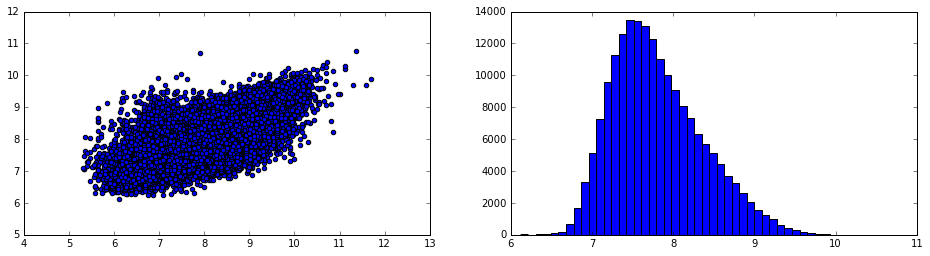

In [129]:
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
plt.scatter(yTrainTrue,yTrainDf[col_name]);
plt.subplot(1,2,2)
plt.hist(yTrainDf[col_name],bins=50);
print yTrainDf[col_name].skew()

# Loading random forest results

In [13]:
# load xgb results
col_name = 'randomeforest_raw_10folds'
yTestDf[col_name] = pd.read_csv('../output/randomforest_10folds.csv' , usecols = ['loss'])
yTestDf[col_name] = np.log(yTestDf[col_name]+shift)
data = joblib.load('../output/randomforest_10folds_pred_on_train.sav')
yTrainDf[col_name] = pd.Series(data[:,0],index = range(0,len(data)))

0.55690759943


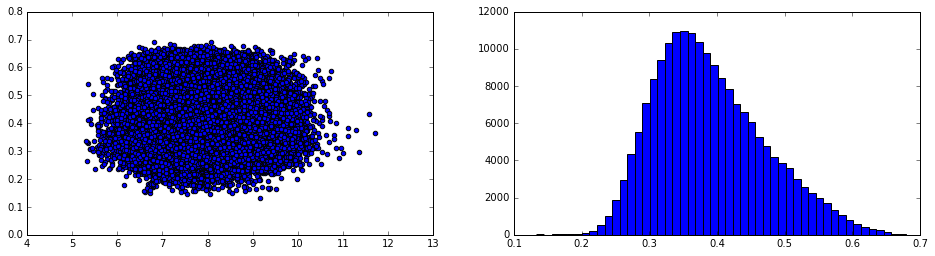

In [15]:
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
plt.scatter(yTrainTrue,yTrainDf[col_name]);
plt.subplot(1,2,2)
plt.hist(yTrainDf[yTrainDf[col_name].notnull()][col_name],bins=50);
print yTrainDf[col_name].skew()

# extra tree

In [139]:
# load xgb results
col_name = 'extratree_raw_10folds'
yTestDf[col_name] = pd.read_csv('../output/extratree_10folds.csv' , usecols = ['loss'])
yTestDf[col_name] = np.log(yTestDf[col_name]+shift)
data = joblib.load('../output/extratree_10folds_pred_on_train.sav')
yTrainDf[col_name] = pd.Series(data[:,0],index = range(0,len(data)))

In [140]:
len(data)

187995

0.558504434219


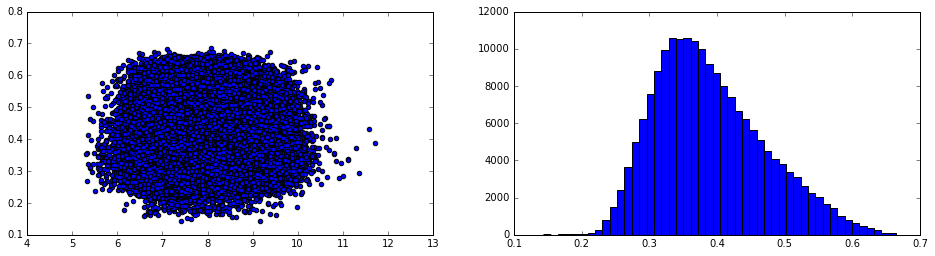

In [131]:
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
plt.scatter(yTrainTrue,yTrainDf[col_name]);
plt.subplot(1,2,2)
plt.hist(yTrainDf[yTrainDf[col_name].notnull()][col_name],bins=50);
print yTrainDf[col_name].skew()

# adaboost - tree

In [132]:
# load xgb results
col_name = 'adb_tree_raw_10folds'
yTestDf[col_name] = pd.read_csv('../output/adaboost_tree_10folds.csv' , usecols = ['loss'])
yTestDf[col_name] = np.log(yTestDf[col_name]+shift)
data = joblib.load('../output/adaboost_tree_10folds_pred_on_train.sav')
yTrainDf[col_name] = pd.Series(data[:,0],index = range(0,len(data)))

0.539081238606


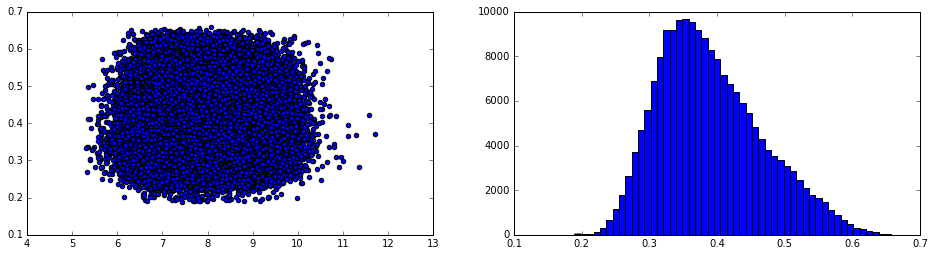

In [133]:
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
plt.scatter(yTrainTrue,yTrainDf[col_name]);
plt.subplot(1,2,2)
plt.hist(yTrainDf[yTrainDf[col_name].notnull()][col_name],bins=50);
print yTrainDf[col_name].skew()

# adaboost - linreg

In [134]:
# load xgb results
col_name = 'adb_lin_raw_10folds'
yTestDf[col_name] = pd.read_csv('../output/adaboost_lineareg_10folds.csv' , usecols = ['loss'])
yTestDf[col_name] = np.log(yTestDf[col_name]+shift)
data = joblib.load('../output/adaboost_lineareg_10folds_pred_on_train.sav')
yTrainDf[col_name] = pd.Series(data[:,0],index = range(0,len(data)))

0.98648861608


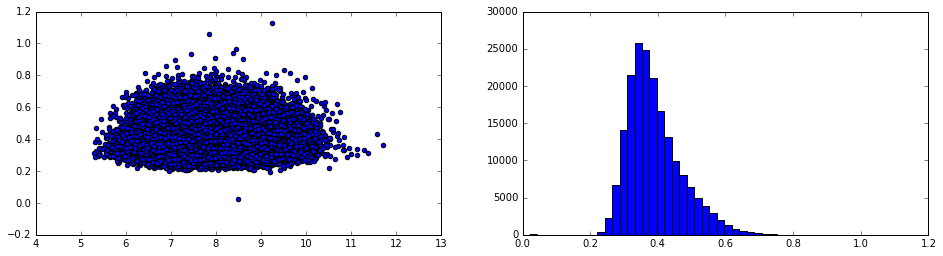

In [135]:
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
plt.scatter(yTrainTrue,yTrainDf[col_name]);
plt.subplot(1,2,2)
plt.hist(yTrainDf[yTrainDf[col_name].notnull()][col_name],bins=50);
print yTrainDf[col_name].skew()

# load mlp results

In [136]:
# load xgb results
col_name = 'mlp_raw_10folds'
yTestDf[col_name] = pd.read_csv('../output/mlp_10folds.csv' , usecols = ['loss'])
yTestDf[col_name] = np.log(yTestDf[col_name]+shift)
data = joblib.load('../output/mlp_10folds_pred_on_train.sav')
yTrainDf[col_name] = pd.Series(data[:,0],index = range(0,len(data)))

0.675702202962


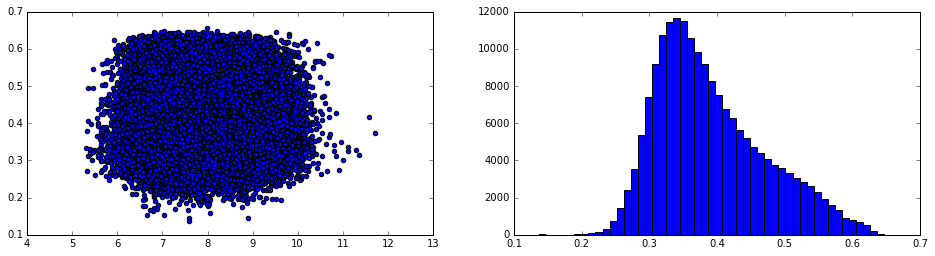

In [137]:
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
plt.scatter(yTrainTrue,yTrainDf[col_name]);
plt.subplot(1,2,2)
plt.hist(yTrainDf[yTrainDf[col_name].notnull()][col_name],bins=50);
print yTrainDf[col_name].skew()

## delete observations with missing values in some of the model output

In [23]:
yTrainTrue = yTrainTrue[yTrainDf['adb_lin_raw_10folds'].notnull()]
yTrainDf= yTrainDf[yTrainDf['adb_lin_raw_10folds'].notnull()]

In [138]:
yTrainDf.isnull().any()

xgb_new_10folds          False
keras_raw_5folds         False
lgbm_raw_10folds         False
lgbm_new_10folds         False
extratree_raw_10folds     True
adb_tree_raw_10folds      True
adb_lin_raw_10folds       True
mlp_raw_10folds           True
dtype: bool

## take a look at the data to train our 2nd-level models

In [25]:
yTrainDf.head()

,xgb_new_10folds,keras_raw_5folds,lgbm_raw_10folds,lgbm_new_10folds,randomeforest_raw_10folds,extratree_raw_10folds,adb_tree_raw_10folds,adb_lin_raw_10folds
0,7.663359,7.541939,7.66744,7.73094,0.388254,0.390366,0.382477,0.323646
1,7.581250,7.444790,7.56177,7.59283,0.366204,0.362748,0.363197,0.364765
2,8.469980,8.314032,8.46479,8.40200,0.474301,0.482711,0.455641,0.508174
3,7.134099,7.089244,7.10650,7.14659,0.283558,0.294964,0.293474,0.289883
4,8.101432,8.160739,8.11564,8.16401,0.434279,0.448823,0.417797,0.494068


In [26]:
yTestDf.head()

,xgb_new_10folds,keras_raw_5folds,lgbm_raw_10folds,lgbm_new_10folds,randomeforest_raw_10folds,extratree_raw_10folds,adb_tree_raw_10folds,adb_lin_raw_10folds
0,7.480592,7.452623,7.458151,7.489216,7.541287,7.575403,7.582784,7.362935
1,7.670829,7.583287,7.673793,7.712615,7.630373,7.696950,7.712469,7.570327
2,9.256260,9.120258,9.096353,9.174894,9.071849,9.050457,8.819917,9.392373
3,8.843674,8.860258,8.715208,8.829814,8.594949,8.650352,8.512880,8.422267
4,6.892198,6.874131,6.911120,6.898241,6.837665,6.844065,6.922715,6.886265


# Stacking model withe linear regression

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
print('stats of predicted yTrainDf')
print sp.stats.describe(yTrainDf)
print('\nstats of predicted yTestDf')
print sp.stats.describe(yTestDf)

stats of predicted yTrainDf
DescribeResult(nobs=187995, minmax=(array([ 6.28989267,  6.24011893,  6.29843   ,  6.12137   ,  0.13327926,
        0.14366337,  0.18938915,  0.02174262]), array([ 10.56902695,  10.60462474,  10.7148    ,  10.7622    ,
         0.69083275,   0.68643226,   0.65736294,   1.1266207 ])), mean=array([ 7.79868381,  7.7752623 ,  7.79943623,  7.79896242,  0.38930674,
        0.38934836,  0.38950758,  0.38963916]), variance=array([ 0.32524268,  0.33648011,  0.29883864,  0.30895838,  0.00662739,
        0.00662138,  0.00590868,  0.00635034]), skewness=array([ 0.61329425,  0.59187553,  0.62410075,  0.59803317,  0.55690316,
        0.55849998,  0.53907694,  0.98648074]), kurtosis=array([-0.01174463, -0.13427405,  0.05159522,  0.01149743, -0.08194342,
       -0.11752756, -0.16351792,  1.16491286]))

stats of predicted yTestDf
DescribeResult(nobs=125546, minmax=(array([ 6.29061246,  6.20555955,  6.25993736,  6.11638448,  6.10247933,
        6.20958254,  6.53437508,  6.515

In [30]:
stackedData = np.vstack([yTrainDf, yTestDf])

([array([      0.,       0.,       0.,       0.,       0.,   21301.,
          223445.,   66951.,    1844.,       0.]),
  array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   2.62950000e+04,
           2.18143000e+05,   6.73950000e+04,   1.70700000e+03,
           1.00000000e+00]),
  array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   1.80000000e+04,
           2.29702000e+05,   6.43910000e+04,   1.44700000e+03,
           1.00000000e+00]),
  array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   1.96340000e+04,
           2.26653000e+05,   6.57780000e+04,   1.47400000e+03,
           2.00000000e+00]),
  array([ 187995.,       0.,       0.,       0.,       0.,    6189.,
           93986.,   25136.,     235.,       0.]),
  array([  1.87995000e+05,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00

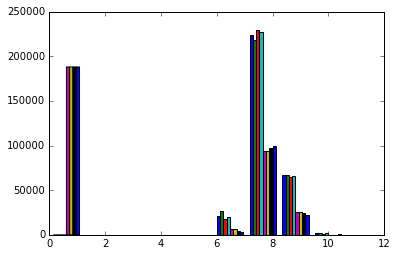

In [36]:
plt.hist(stackedData)

In [ ]:
ss = StandardScaler()
x_ydata = ss.fit_transform(stackedData)
x_ytrain = x_ydata[0:yTrainDf.shape[0],:]
x_ytest = x_ydata[yTrainDf.shape[0]:,:]
y_ytrain = yTrainTrue
print('stats of standardized megafeatures')
print sp.stats.describe(x_ydata)
print('\nshape of x_ytrain')
print x_ytrain.shape
print('\nshape of x_ytest')
print x_ytest.shape
print('\nstats of y_ytrain')
print sp.stats.describe(y_ytrain)

### Ridge

In [31]:
from sklearn import linear_model
lrm = linear_model.Ridge(alpha=10)
lrm.fit(x_ytrain,y_ytrain)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [32]:
print('alpha:')
print lrm.coef_
print('the model weighing coefs:')
print lrm.coef_
print ('\nthe intercept')
print lrm.intercept_
# print ('\nresidual')
# print np.exp(lrm.residues_/len(y_pred))-shift

alpha:
[ 0.12364692  0.14810264  0.09354364  0.19562605 -0.032466   -0.0605717
  0.01840797  0.07866662]
the model weighing coefs:
[ 0.12364692  0.14810264  0.09354364  0.19562605 -0.032466   -0.0605717
  0.01840797  0.07866662]

the intercept
7.80274052373


### linear regression

In [33]:
lrm = LinearRegression(n_jobs = 16)
lrm.fit(x_ytrain,y_ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=16, normalize=False)

### predicting and save

In [34]:
y_pred = np.exp(lrm.predict(x_ytest)) - shift
print('the model weighing coefs:')
print lrm.coef_
print ('\nthe intercept')
print lrm.intercept_

the model weighing coefs:
[ 0.12352717  0.14816647  0.09318103  0.19605458 -0.09056186 -0.21662156
  0.15965829  0.1641076 ]

the intercept
7.81301584099


In [23]:
submission = pd.read_csv('../input/sample_submission.csv',)
submission['loss'] = y_pred
print submission.head()
submission.to_csv('../output/stacked_xgb_keras.csv', index=False, index_label='id')

   id         loss
0   4  1582.106776
1   6  1900.409195
2   9  9605.169927
3  12  6713.870335
4  15   804.658330


## xgboost with linear regression

In [79]:
import xgboost as xgb
from sklearn.cross_validation import KFold
fair_constant = 0.7
def fair_obj(preds, dtrain):
    labels = dtrain.get_label()
    x = (preds - labels)
    den = abs(x) + fair_constant
    grad = fair_constant * x / (den)
    hess = fair_constant * fair_constant / (den * den)
    return grad, hess

def xg_eval_mae(yhat, dtrain):
    y = dtrain.get_label()
    return 'mae', mean_absolute_error(np.exp(y)-shift,
                                      np.exp(yhat)-shift)

In [80]:
ss = StandardScaler()
x_ytrain = ss.fit_transform(yTrainDf)
x_ytest = ss.fit_transform(yTestDf)
y_ytrain = yTrainTrue

In [81]:
n_folds = 5
cv_sum = 0
early_stopping = 100
fpred = []
xgb_rounds = []

d_train_full = xgb.DMatrix(x_ytrain, label=y_ytrain)
d_test = xgb.DMatrix(x_ytest)

n_folds = 10
kf = KFold(x_ytrain.shape[0], n_folds=n_folds)
pred_x_train = np.zeros((x_ytrain.shape[0],1))
for i, (train_index, test_index) in enumerate(kf):
    print('\n Fold %d' % (i+1))
    X_train, X_val = x_ytrain[train_index], x_ytrain[test_index]
    y_train, y_val = y_ytrain[train_index], y_ytrain[test_index]

    rand_state = 2016

    params = {
        'seed': 0,
        'colsample_bytree': 0.7,
        'silent': 1,
        'subsample': 0.7,
        'learning_rate': 0.03,
        'objective': 'reg:linear',
        'max_depth': 12,
        'min_child_weight': 100,
        'booster': 'gbtree'}

    d_train = xgb.DMatrix(X_train, label=y_train)
    d_valid = xgb.DMatrix(X_val, label=y_val)
    watchlist = [(d_train, 'train'), (d_valid, 'eval')]

    clf = xgb.train(params,
                    d_train,
                    100000,
                    watchlist,
                    early_stopping_rounds=50,
                    obj=fair_obj,
                    feval=xg_eval_mae,
                    verbose_eval=False)

    xgb_rounds.append(clf.best_iteration)
    scores_val = clf.predict(d_valid, ntree_limit=clf.best_ntree_limit)
    pred_x_train[test_index,0] = clf.predict(d_valid, ntree_limit=clf.best_ntree_limit)
    cv_score = mean_absolute_error(np.exp(y_val), np.exp(scores_val))
    print('eval-MAE: %.6f' % cv_score)
    y_pred = np.exp(clf.predict(d_test, ntree_limit=clf.best_ntree_limit)) - shift

    if i > 0:
        fpred = pred + y_pred
    else:
        fpred = y_pred
    pred = fpred
    cv_sum = cv_sum + cv_score

mpred = pred / n_folds
score = cv_sum / n_folds
print('Average eval-MAE: %.6f' % score)
n_rounds = int(np.mean(xgb_rounds))


 Fold 1
eval-MAE: 1130.943364

 Fold 2
eval-MAE: 1116.815224

 Fold 3


KeyboardInterrupt: 

In [63]:
ids = pd.read_csv('../input/test.csv')['id']
print("Writing results")
result = pd.DataFrame(mpred, columns=['loss'])
result["id"] = ids
result = result.set_index("id")
print("%d-fold average prediction:" % n_folds)

score = str(round((cv_sum / n_folds), 6))
sub_file = '../output/stacked_xgb_keras_2ndxgb_10folds.csv'
print("Writing submission: %s" % sub_file)
result.to_csv(sub_file, index=True, index_label='id')

Writing results
10-fold average prediction:
Writing submission: ../output/stacked_xgb_keras_2ndxgb_10folds.csv
